In [1]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [2]:
data0 = pd.read_csv("parking-tickets-2011/Parking_Tags_Data_2011.csv")
data1 = pd.read_csv("parking-tickets-2012/Parking_Tags_Data_2012.csv")



In [3]:
new_df = pd.concat([data0, data1])

In [4]:
records = len(data0.index)
record1 = len(data1.index)

print("The number of tickets generated in 2011 is:", records)

print("The number of tickets generated in 2012 is:", record1)

The number of tickets generated in 2011 is: 2805492
The number of tickets generated in 2012 is: 2746154


In [5]:
records = len(new_df.index)
print(records)

5551646


In [6]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***77243,20110101,8,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
1,***77244,20110101,8,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
2,***99464,20110101,29,PARK PROHIBITED TIME NO PERMIT,30,0.0,OPP,241 TORRENS AVE,NaN,NaN,ON
3,***77245,20110101,15,PARK 3 M OF FIRE HYDRANT,100,1.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
4,***99465,20110101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,OPP,245 TORRENS AVE,NaN,NaN,ON
5,***15866,20110101,3,PARK/LEAVE ON PRIVATE PROPERTY,30,1.0,AT,50 CORDOVA AVE,NaN,NaN,ON
6,***18016,20110101,9,STOP HWY PROHIBITED TIME/DAY,60,1.0,OPP,200 ELIZABETH ST,NaN,NaN,ON
7,***15867,20110101,3,PARK/LEAVE ON PRIVATE PROPERTY,30,2.0,AT,50 CORDOVA AVE,NaN,NaN,ON
8,***46420,20110101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,80 MILL ST,NaN,NaN,ON
9,***77246,20110101,5,PARK HWY PRO TIMES/DAYS,40,3.0,OPP,150 BOROUGH DR,NaN,NaN,ON


In [7]:
new_df.tail(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
2746144,***93169,20121231,9,STOP HWY PROHIBITED TIMES/DAYS,60,2340.0,NR,15 MARINE PARADE DR,NaN,NaN,ON
2746145,***93170,20121231,9,STOP HWY PROHIBITED TIMES/DAYS,60,2341.0,NR,15 MARINE PARADE DR,NaN,NaN,ON
2746146,***59446,20121231,15,PARK 3M OF FIRE HYDRANT,100,2342.0,NR,420 WELLINGTON ST W,NaN,NaN,ON
2746147,***93171,20121231,9,STOP HWY PROHIBITED TIMES/DAYS,60,2342.0,NR,15 MARINE PARADE DR,NaN,NaN,ON
2746148,***59447,20121231,15,PARK 3M OF FIRE HYDRANT,100,2346.0,NR,17 NIAGARA ST,NaN,NaN,ON
2746149,***42093,20121231,3,PARK/LEAVE ON PRIVATE PROPERTY,30,2347.0,AT,1300 YORK MILLS RD,NaN,NaN,ON
2746150,***70154,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2358.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON
2746151,***02736,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2358.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON
2746152,***02737,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2359.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON
2746153,***74211,20121231,3,PARK/LEAVE ON PRIVATE PROPERTY,30,NaN,NaN,1800 SHEPPARD AVE E,NaN,NaN,ON


In [8]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***77243,20110101,8,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
1,***77244,20110101,8,STAND VEH HWY PRO TIMES/DAYS,60,0.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
2,***99464,20110101,29,PARK PROHIBITED TIME NO PERMIT,30,0.0,OPP,241 TORRENS AVE,NaN,NaN,ON
3,***77245,20110101,15,PARK 3 M OF FIRE HYDRANT,100,1.0,NR,60 BRIAN HARRISON WAY,NaN,NaN,ON
4,***99465,20110101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,OPP,245 TORRENS AVE,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
2746149,***42093,20121231,3,PARK/LEAVE ON PRIVATE PROPERTY,30,2347.0,AT,1300 YORK MILLS RD,NaN,NaN,ON
2746150,***70154,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2358.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON
2746151,***02736,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2358.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON
2746152,***02737,20121231,9,STOP HWY PROHIBITED TIME/DAY,60,2359.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON


In [9]:
no_of_records = len(new_df.index)
print(no_of_records)

5551646


In [10]:
sum1 = new_df['set_fine_amount'].sum()
print("The total Revenue of year 2011 and 2012 is: CA$",sum1)


The total Revenue of year 2011 and 2012 is: CA$ 225712160


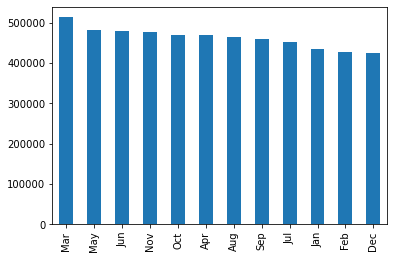

In [11]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [12]:
new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Group by month and year, and sum the 'sales_amount' for each month-year combination
monthly_revenue = new_df.groupby(new_df['date_of_infraction'].dt.to_period('M'))['set_fine_amount'].sum()

# Print the result
print(monthly_revenue)

date_of_infraction
2011-01     8391100
2011-02     8193855
2011-03    10283105
2011-04     9781715
2011-05    10001845
2011-06    10283645
2011-07     9573000
2011-08     9771250
2011-09     9450175
2011-10     9392350
2011-11     9739070
2011-12     9365485
2012-01     9237430
2012-02     9119365
2012-03    10347485
2012-04     9270210
2012-05     9721450
2012-06     9219250
2012-07     9218055
2012-08     9209565
2012-09     9095720
2012-10     9465145
2012-11     9489900
2012-12     8091990
Freq: M, Name: set_fine_amount, dtype: int64


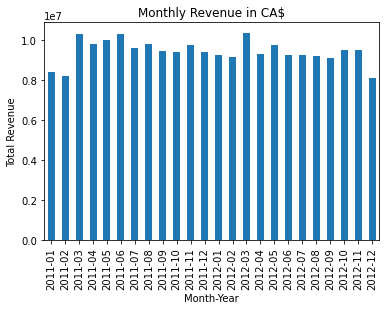

In [13]:
monthly_revenue.plot.bar()

plt.title('Monthly Revenue in CA$')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')

plt.show()

In [15]:
revenue_2011 = monthly_revenue[monthly_revenue.index.year == 2011]
total_revenue_2011 = revenue_2011.sum()
print("Total Revenue of Parking Tickets for 2011 is: CA$", total_revenue_2011)

revenue_2012 = monthly_revenue[monthly_revenue.index.year == 2012]
total_revenue_2012 = revenue_2012.sum()
print("Total Revenue of Parking Tickets for 2012 is: CA$", total_revenue_2012)

Total Revenue of Parking Tickets for 2011 is: CA$ 114226595
Total Revenue of Parking Tickets for 2012 is: CA$ 111485565


In [16]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***77243         2011-01-01                8   
1          ***77244         2011-01-01                8   
2          ***99464         2011-01-01               29   
3          ***77245         2011-01-01               15   
4          ***99465         2011-01-01               29   

           infraction_description  set_fine_amount  time_of_infraction  \
0    STAND VEH HWY PRO TIMES/DAYS               60                 0.0   
1    STAND VEH HWY PRO TIMES/DAYS               60                 0.0   
2  PARK PROHIBITED TIME NO PERMIT               30                 0.0   
3        PARK 3 M OF FIRE HYDRANT              100                 1.0   
4  PARK PROHIBITED TIME NO PERMIT               30                 1.0   

  location1              location2 location3 location4 province  month_num  \
0        NR  60 BRIAN HARRISON WAY       NaN       NaN       ON          1   
1        NR  60 BRIAN HARRISON WAY       NaN

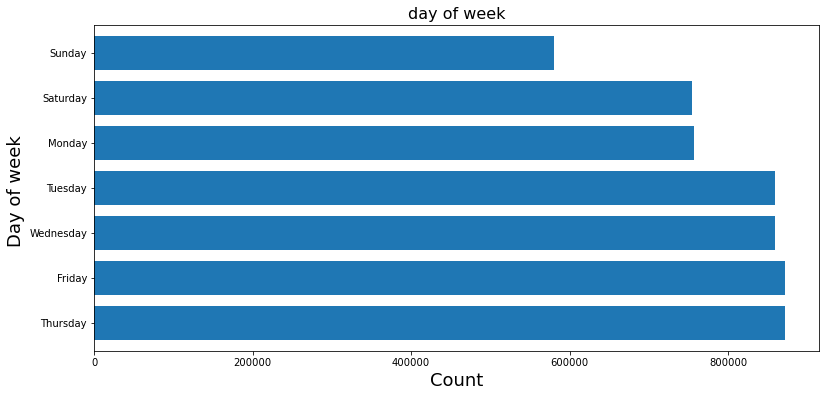

In [17]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()



The data includes 5,551,646 tickets given out across 731 days. The date range 
spans 730 days from 2011-01-01 to 2012-12-31 .



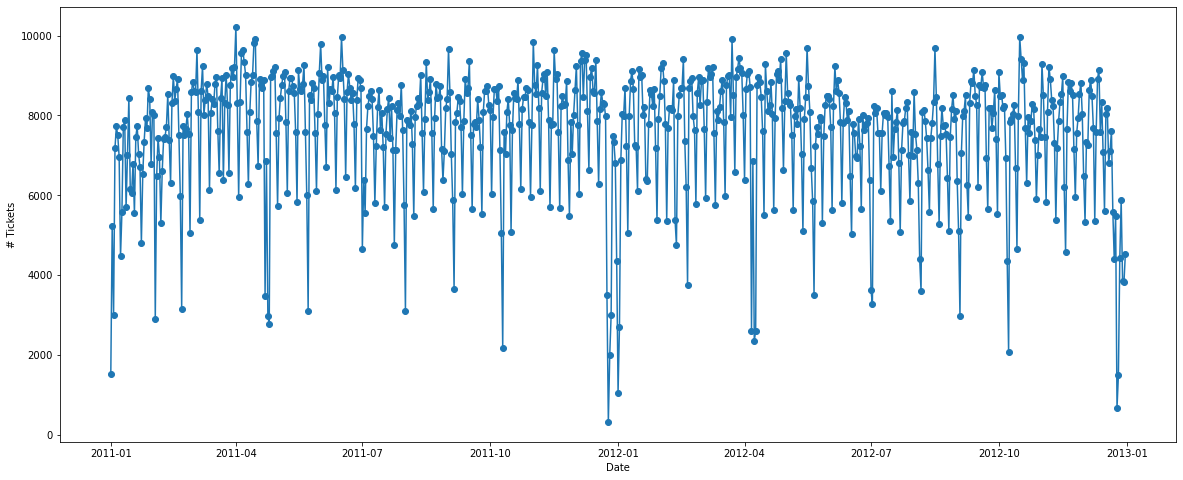

13262

In [18]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

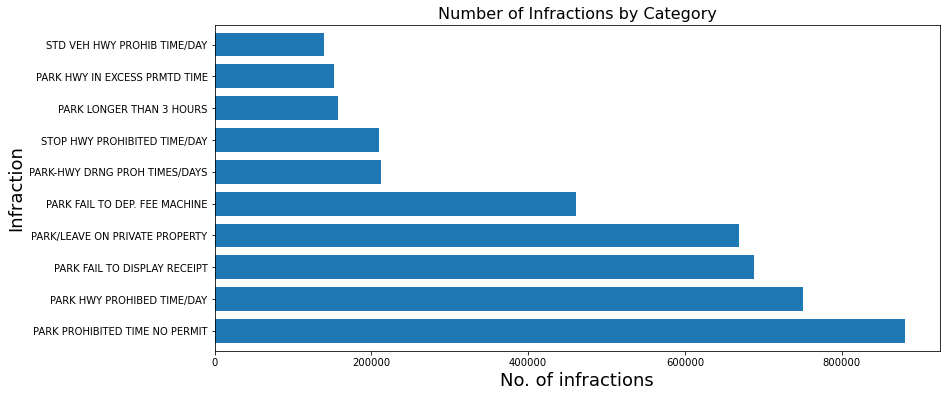

In [19]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [20]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [21]:
print(fine_by_infraction)

infraction_description
ANGLE PARK-METERED SPACE-FRONT      240
FAIL ANGLE PARK/STOP-DSGNTD SP       15
FAIL PARK/STOP PAR RH LTD HWY     21480
FAIL PARK/STOP PAR RT HAND LTD    21225
FAIL PARK/STOP PARA LFT LMT HW      150
                                  ...  
STOP/STAND/PARK - NO VEND ZONE      420
STOP/STAND/PARK NOT DESIG AREA      315
STOP/STAND/PARK VEND CONT ZONE    13020
STOP/STAND/PARK VEND NO PERMIT      840
STOP=BSD OBSTR RDWY-IMPEDE TRF      600
Name: set_fine_amount, Length: 359, dtype: int64


In [22]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK HWY PROHIBED TIME/DAY        30044200
PARK PROHIBITED TIME NO PERMIT    26440230
PARK FAIL TO DISPLAY RECEIPT      20638620
PARK/LEAVE ON PRIVATE PROPERTY    20081100
PARK FAIL TO DEP. FEE MACHINE     13822290
STOP HWY PROHIBITED TIME/DAY      12599100
PARK IN A FIRE ROUTE              11557750
PARK-HWY DRNG PROH TIMES/DAYS      8482040
STD VEH HWY PROHIB TIME/DAY        8383800
STOP-HWY-PROHIBITED TIMES/DAYS     8191020
Name: set_fine_amount, dtype: int64


In [23]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,5291197
QC,69139
AB,23213
NY,21798
BC,13583
NS,12040
FL,10559
MI,9597
MB,7283


In [24]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       5549614
unique        26923
top        YONGE ST
freq         171197
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,171197
BLOOR ST W,133733
DANFORTH AVE,101081
QUEEN ST W,99635
KING ST W,84487
QUEEN ST E,73907
COLLEGE ST,63718
ST CLAIR AVE W,61876
DUNDAS ST W,52166


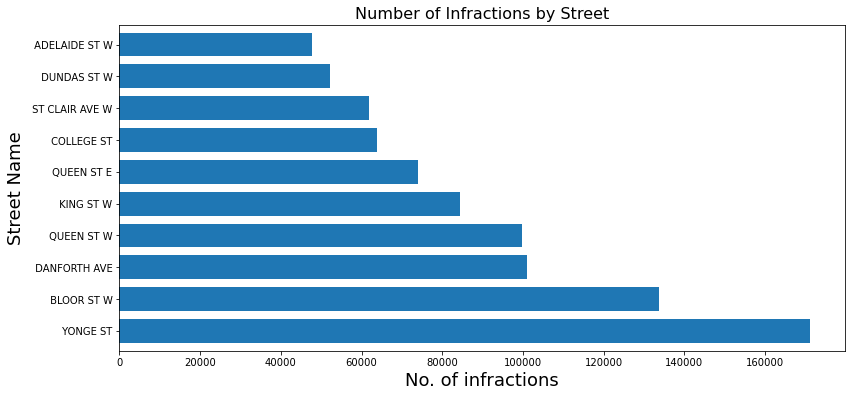

In [25]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [26]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       5549614
unique        26923
top        YONGE ST
freq         171197
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,171197
BLOOR ST W,133733
DANFORTH AVE,101081
QUEEN ST W,99635
KING ST W,84487
QUEEN ST E,73907
COLLEGE ST,63718
ST CLAIR AVE W,61876
DUNDAS ST W,52166


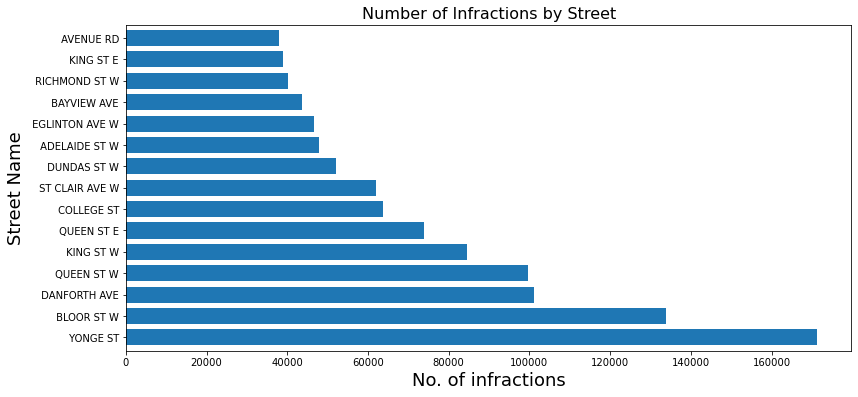

In [27]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

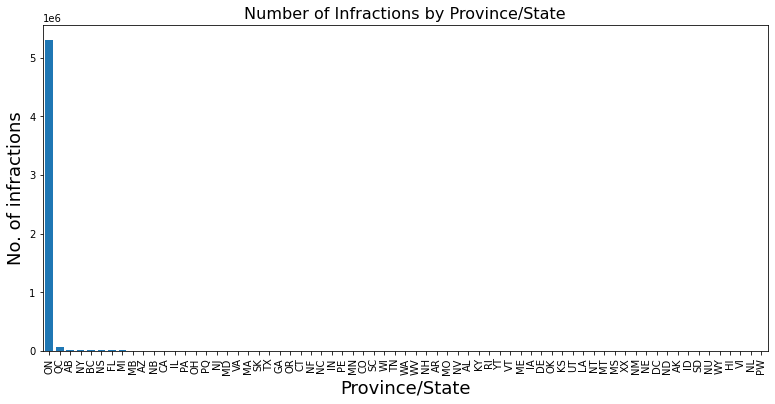

In [28]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [29]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,5291197
Other,260449


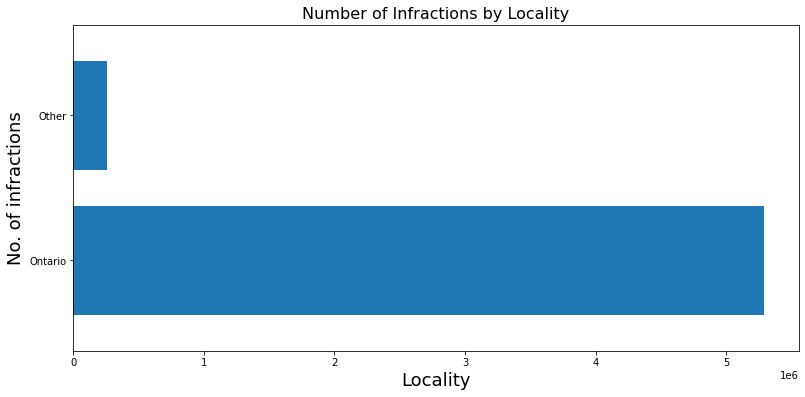

In [30]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()